## Multiclass Classification
### First method: k-nearest neighbours (kNN)
### Second method: Logistic Regression + gradient descent

### Imports

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import unittest
import math

### Data generatar

In [23]:
# all data
def standard_data_generator(N):
    labels = np.array([[1]]*N + [[2]]*N + [[3]]*N + [[4]]*N)
    
    return [random_data(1.5, 0.3, N), random_data(1.5, 0.55, N), 
            random_data(0.5, 0.45, N), random_data(1.5, 0.45, N),
            random_data(0.5, 0.55, N), random_data(0.5, 0.35, N),
            random_data(1.5, 0.45, N), random_data(0.5, 0.2, N)], labels
    
def random_data(a, rng, N):
    data = np.random.uniform(a - rng, a + rng, size = N)
    return np.array([[d] for d in data])

### How does the data actually look like

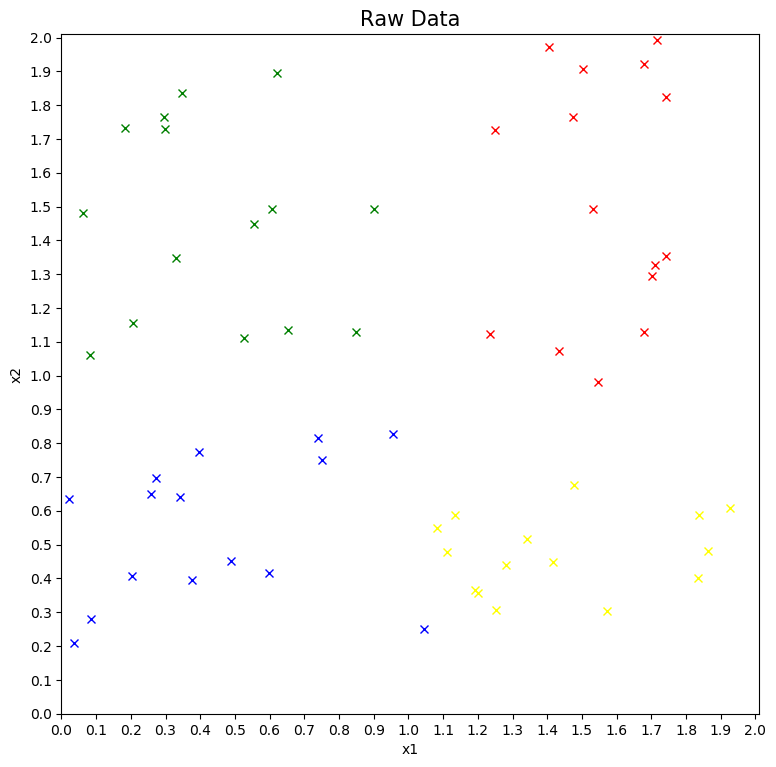

In [24]:
# settings
x_min = 0
x_max = 2.01
y_min = 0
y_max = 2.01
period = 0.1

# graph settings
plt.figure(figsize=(9,9), dpi=100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(x_min,x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max, period))
plt.yticks(np.arange(y_min, y_max, period))
plt.xlabel("x1", fontsize=10)
plt.ylabel("x2", fontsize=10)

# raw data call:
data, labels = standard_data_generator(15)
conc_data_x1 = np.concatenate([d for d in data[::2]])
conc_data_x2 = np.concatenate([d for d in data[1::2]])
conc_data = {'x1': conc_data_x1, 'x2':conc_data_x2, 'y': labels}
plt.plot(data[0],data[1], 'x', color='red')
plt.plot(data[2],data[3], 'x', color='green')
plt.plot(data[4],data[5], 'x', color = 'blue')
plt.plot(data[6],data[7], 'x', color = 'yellow')

# showing resluts
plt.title("Raw Data", fontsize = 15)
plt.show()

### error function

In [134]:
def error_function(distribution, y_labels):
    N, M = np.shape(distribution)
    res = 0
    uniq = np.unique(y_labels).shape[0]
    distribution = np.fliplr(distribution)
    for n in range(N):
        if np.argmax(distribution[n]) != (uniq - 1 - y_labels[n]):
            res += 1
    return res / N

### k-Nearest Neighbours

In [130]:
def learn_algorithm(train_data, val_data):
    # policzyć odległości między x_val a x_train
    # posortować te odległości -> żeby posptrowały się też label'e w y_train
    # dla każdego k: policzyć rozkład z str, k i błąd z y_val i rozkładu
    # znaleźć najmniejszy błąd i najlepsze k
        
    x1_train = train_data['x1']
    x2_train = train_data['x2']
    y_train = train_data['y']

    x1_val = val_data['x1']
    x2_val = val_data['x2']
    y_val = val_data['y']
    
    N1 = x1_val.shape[0]
    N2 = x1_train.shape[0]
    
    dists = calculate_distance(x1_val, x2_val, x1_train, x2_train)
    srt = sort_distances(dists, y_train)
    
    k_values = np.arange(1,N2)
    print(k_values)
    
    errs = [error_function(calculate_distribution_knn(srt, k), y_val) for k in k_values]
    return min(errs), k_values[errs.index(min(errs))]


def calculate_distance(x1, x2, x1_train, x2_train):
    N1 = np.shape(x1)[0]
    N2 = np.shape(x1_train)[0]
    dists = np.array([((x1[v, 0] - x1_train)**2 + (x2[v, 0] - x2_train)**2)**(0.5) for v in range(N1)])
    return dists[:,:,0]

def sort_distances(dists, y_labels):
    return y_labels[dists.argsort(kind='mergesort')][:,:,0]

def calculate_distribution_knn():
    M = np.unique(y_labels).shape[0]
    res = list()
    for line in y:
        new_row = [0] * M
        for ki in range(k):
            new_row[line[ki]] += 1 / k
        res.append(new_row)
    return np.array(res)

#        srt = sort_train_labels_knn(hamming_distance(X_val, X_train), y_train)
#        errs = [classification_error(p_y_x_knn(srt, k), y_val) for k in k_values]
#        return min(errs), k_values[errs.index(min(errs))], errs

### Comparison

### Logistic Regression + gradient descent

In [131]:
# TODO

# Unittests

In [135]:
x1_train = np.array([[1],[1],[4],[2],[2],[-2],[-2],[-3],[-1],[-2]])
x2_train = np.array([[1],[2],[3],[2],[1],[1],[0],[1],[-1],[-2]])
y_train = np.array([[1]]*5 + [[2]]*5)
x1_val = np.array([[3],[4],[1],[-1],[-1]])
x2_val = np.array([[1],[1],[0],[1],[0]])
y_val = np.array([[1]]*3 + [[2]]*2)
N1 = 5
N2 = 10

def clac(x1v, x2v, x1t, x2t):
    return math.sqrt((x1v-x1t)**2 + (x2v - x2t)**2)

def expected_dists():
    expected = list()
    for v in range(N1):
        x1v = x1_val[v, 0]
        x2v = x2_val[v, 0]
        expected.append([clac(x1v,x2v,x1_train[t, 0],x2_train[t, 0]) for t in range(N2)])
    return np.array(expected)
    
class KnnTests(unittest.TestCase):
    
    def test_calculate_distance(self):
        answer = calculate_distance(x1_val.copy(), x2_val.copy(), x1_train.copy(), x2_train.copy())
        expected = expected_dists()
        self.assertEqual(expected.tolist(), answer.tolist())
        
    def test_sort_distances(self):
        answer = sort_distances(expected_dists(), y_train)
        self.assertEqual((N1, N2), answer.shape)
    
    def test_calculate_distribution_knn(self):
        pass

In [136]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_calculate_distance (__main__.KnnTests) ... ok
test_calculate_distribution_knn (__main__.KnnTests) ... ok
test_sort_distances (__main__.KnnTests) ... 

2
[[1 1 1 1 1 2 2 2 2 2]
 [1 1 1 1 1 2 2 2 2 2]
 [1 1 1 1 2 2 2 2 2 1]
 [2 2 1 2 2 1 1 1 2 1]
 [2 2 2 1 2 2 1 1 1 1]]


ok

----------------------------------------------------------------------
Ran 3 tests in 0.012s

OK
